In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import os, random
import cv2
import pandas as pd
import seaborn as sns
from pathlib import Path
from PIL import Image

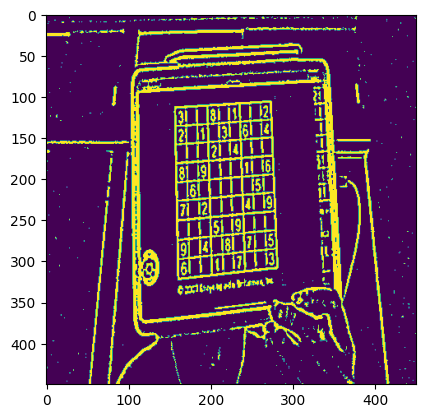

In [2]:
sudoku_a = cv2.imread('puzzle/puzzle1.jpg')
#Preprocessing image to be read
sudoku_a = cv2.resize(sudoku_a, (450,450))
# function to greyscale, blur and change the receptive threshold of image
def preprocess(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    blur = cv2.GaussianBlur(gray, (3,3),6) 
    #blur = cv2.bilateralFilter(gray,9,75,75)
    threshold_img = cv2.adaptiveThreshold(blur,255,1,1,11,2)
    return threshold_img
threshold = preprocess(sudoku_a)
#let's look at what we have got
plt.figure()
plt.imshow(threshold)
plt.show()

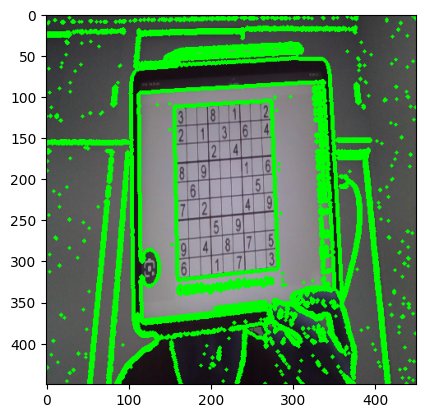

In [3]:
# Finding the outline of the sudoku puzzle in the image
contour_1 = sudoku_a.copy()
contour_2 = sudoku_a.copy()
contour, hierarchy = cv2.findContours(threshold,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_1, contour,-1,(0,255,0),3)
#let's see what we got
plt.figure()
plt.imshow(contour_1)
plt.show()

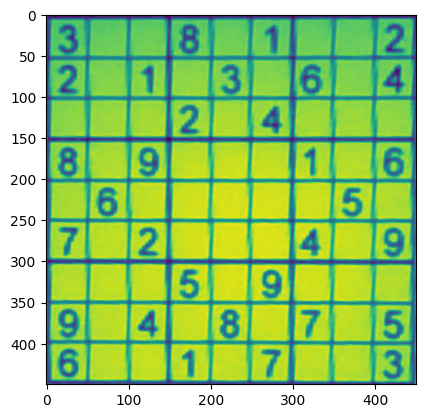

In [4]:
def main_outline(contour):
    biggest = np.array([])
    max_area = 0
    for i in contour:
        area = cv2.contourArea(i)
        if area >50:
            peri = cv2.arcLength(i, True)
            approx = cv2.approxPolyDP(i , 0.02* peri, True)
            if area > max_area and len(approx) ==4:
                biggest = approx
                max_area = area
    return biggest ,max_area
    
def reframe(points):
    points = points.reshape((4, 2))
    points_new = np.zeros((4,1,2),dtype = np.int32)
    add = points.sum(1)
    points_new[0] = points[np.argmin(add)]
    points_new[3] = points[np.argmax(add)]
    diff = np.diff(points, axis =1)
    points_new[1] = points[np.argmin(diff)]
    points_new[2] = points[np.argmax(diff)]
    return points_new
def splitcells(img):
    rows = np.vsplit(img,9)
    boxes = []
    for r in rows:
        cols = np.hsplit(r,9)
        for box in cols:
            boxes.append(box)
    return boxes
    
black_img = np.zeros((450,450,3), np.uint8)
biggest, maxArea = main_outline(contour)

if biggest.size != 0:
    biggest = reframe(biggest)
    
cv2.drawContours(contour_2,biggest,-1, (0,255,0),10)

pts1 = np.float32(biggest)
pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])

matrix = cv2.getPerspectiveTransform(pts1,pts2)

imagewrap = cv2.warpPerspective(sudoku_a,matrix,(450,450))
imagewrap =cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(imagewrap)
plt.show()

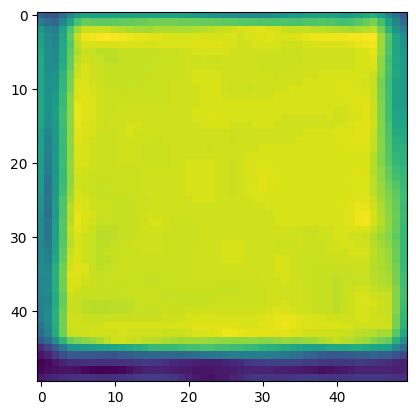

(50, 50)


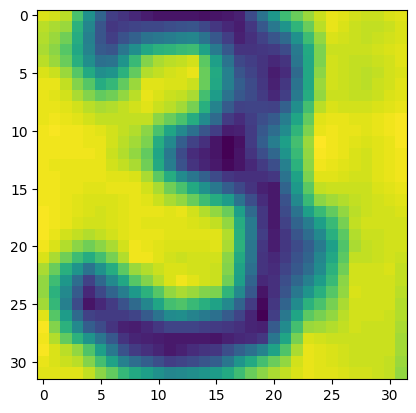

(81, 32, 32)


In [6]:
sudoku_cell = splitcells(imagewrap)
#Let's have alook at the last cell

for i in range(81):
    sudoku_cell[i]=cv2.resize(sudoku_cell[i],(50,50))
    
plt.figure()
plt.imshow(sudoku_cell[73])
plt.show()
print(sudoku_cell[4].shape)

def CropCell(cells):
    Cells_croped = []
    for image in cells:
        img = np.array(image)
        img = img[12:44, 9:41]
        img = Image.fromarray(img)
        Cells_croped.append(img)
    return Cells_croped
        
sudoku_cell_croped= CropCell(sudoku_cell)
plt.figure()
plt.imshow(sudoku_cell_croped[80])
plt.show()
data = np.array(sudoku_cell_croped)
print(data.shape)

In [7]:
from keras.models import load_model
model = load_model('Models/NumModelV1.keras')

In [8]:
data = np.array(sudoku_cell_croped)
print(data.shape)
data = data.reshape(data.shape[0], data.shape[1], data.shape[2],1)
print(data.shape)

line = []
for i in range(81):
        
    if np.all(data[i]>90):
        line.append(0)
        continue
        
    fortest = np.reshape(data[i], (1, 32, 32, 1))
    line.append(np.argmax(model.predict(fortest)))

(81, 32, 32)
(81, 32, 32, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━

In [9]:
print(line)
len(line)
list_puzz = []
for i in range(9):
    a=i*9
    list_puzz.append(line[a:a+9])

[3, 0, 0, 8, 0, 7, 0, 0, 2, 2, 0, 7, 0, 3, 0, 5, 0, 4, 0, 0, 0, 2, 0, 4, 0, 0, 0, 6, 0, 9, 0, 0, 0, 7, 0, 5, 0, 5, 0, 0, 0, 0, 0, 5, 0, 7, 0, 2, 0, 0, 0, 4, 0, 3, 0, 0, 0, 5, 0, 9, 0, 0, 0, 5, 0, 4, 0, 5, 0, 7, 0, 5, 5, 0, 0, 7, 0, 7, 0, 0, 3]


In [10]:
print(list_puzz)
len(list_puzz)

[[3, 0, 0, 8, 0, 7, 0, 0, 2], [2, 0, 7, 0, 3, 0, 5, 0, 4], [0, 0, 0, 2, 0, 4, 0, 0, 0], [6, 0, 9, 0, 0, 0, 7, 0, 5], [0, 5, 0, 0, 0, 0, 0, 5, 0], [7, 0, 2, 0, 0, 0, 4, 0, 3], [0, 0, 0, 5, 0, 9, 0, 0, 0], [5, 0, 4, 0, 5, 0, 7, 0, 5], [5, 0, 0, 7, 0, 7, 0, 0, 3]]


9

In [11]:
array_puzz=np.array(list_puzz)
print(array_puzz)

[[3 0 0 8 0 7 0 0 2]
 [2 0 7 0 3 0 5 0 4]
 [0 0 0 2 0 4 0 0 0]
 [6 0 9 0 0 0 7 0 5]
 [0 5 0 0 0 0 0 5 0]
 [7 0 2 0 0 0 4 0 3]
 [0 0 0 5 0 9 0 0 0]
 [5 0 4 0 5 0 7 0 5]
 [5 0 0 7 0 7 0 0 3]]


In [14]:
np.save('puzzarray', array_puzz)